Summary Statistics by Coupon Type:
                    count      mean       std  min  25%  50%  75%  max
coupon                                                                
Restaurant(20-50)  1492.0  0.441019  0.496676  0.0  0.0  0.0  1.0  1.0
Restaurant(<20)    2786.0  0.707107  0.455171  0.0  0.0  1.0  1.0  1.0

Acceptance Rates:
coupon
Restaurant(20-50)    0.441019
Restaurant(<20)      0.707107
Name: coupon_used, dtype: float64


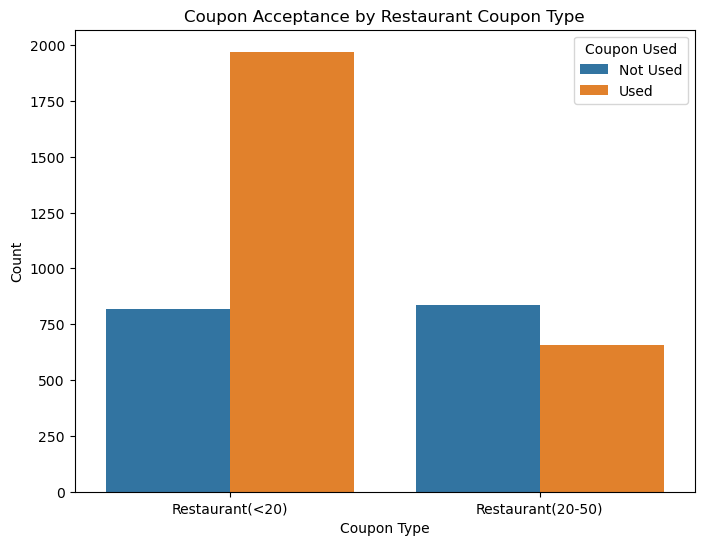


Chi-square Test:
Chi2 Statistic: 289.2352598190562
p-value: 7.297717100967607e-65
There is a statistically significant association between coupon type and coupon usage.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Load the Data
data = pd.read_csv("data/coupons.csv")

# Filter the data to include only the relevant coupon types
coupon_data = data[data['coupon'].isin(['Restaurant(<20)', 'Restaurant(20-50)'])]

# 2. Statistical Summarization
# Summary statistics for coupon_used by coupon type
summary = coupon_data.groupby('coupon')['coupon_used'].describe()
print("Summary Statistics by Coupon Type:")
print(summary)

# Calculate acceptance rate (assuming coupon_used is binary: 1 = accepted, 0 = not accepted)
acceptance_rate = coupon_data.groupby('coupon')['coupon_used'].mean()
print("\nAcceptance Rates:")
print(acceptance_rate)

# 3. Data Visualization
# Count plot to visualize coupon usage by coupon type
plt.figure(figsize=(8,6))
sns.countplot(x='coupon', hue='coupon_used', data=coupon_data)
plt.title("Coupon Acceptance by Restaurant Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.legend(title="Coupon Used", labels=["Not Used", "Used"])
plt.show()

# 4. Statistical Testing
# Create a contingency table for chi-square test (learned about it while googling)
contingency_table = pd.crosstab(coupon_data['coupon'], coupon_data['coupon_used'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-square Test:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("There is a statistically significant association between coupon type and coupon usage.")
else:
    print("There is no statistically significant association between coupon type and coupon usage.")
